In [207]:
import numpy as np
import pandas as pd
import glob
import json
import math
from natsort import natsorted
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# model predictions

In [208]:
df60k = pd.read_json('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/Labeled_2261_test_yPred_preTrainFT_RoBERTa_60kSteps.json', orient='records')

In [209]:
df60k.head(1)

,replyDate,text,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0


In [210]:
df60k['y_pred'].value_counts()

2    803
0    757
1    701
Name: y_pred, dtype: int64

In [211]:
# Print the first few rows to verify
df60k.head()

,replyDate,text,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0
1,1640990640,I don’t care about him retiring! I want to kno...,AnalyzingAmerica.json,1,1
2,1655419773,The gallows have claimed him already,TrumpSupportersChannel.json,2,2
3,1668105585,We The People need to see EBS and military SOO...,ThePatriotVoice.json,0,2
4,1692627228,DEWs shot down to murder the locals in the way...,ResisttheMainstream.json,0,2


In [212]:
precision_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.9027897105998469

In [213]:
recall_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.9026979212737727

In [214]:
f1_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.9027366536885355

In [215]:
accuracy_score(df60k['Label'], df60k['y_pred'])

0.9026979212737727

In [216]:
# Generate classification report
class_report = classification_report(df60k['Label'], df60k['y_pred'])

In [217]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       753
           1       0.92      0.92      0.92       699
           2       0.92      0.91      0.92       809

    accuracy                           0.90      2261
   macro avg       0.90      0.90      0.90      2261
weighted avg       0.90      0.90      0.90      2261



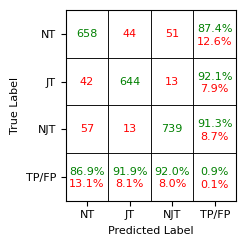

[[658.          44.          51.          87.38379814]
 [ 42.         644.          13.          92.1316166 ]
 [ 57.          13.         739.          91.3473424 ]
 [ 86.92206077  91.86875892  92.02988792   0.        ]]


In [311]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

df = df60k.copy()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df['Label'], df['y_pred'])
# Calculate sums for each column and row
row_sums = conf_matrix.sum(axis=1)
col_sums = conf_matrix.sum(axis=0)
# Calculate required percentages for columns
col_percent = [
    [
        conf_matrix[i, i] / row_sums[i] * 100 if row_sums[i] > 0 else 0,  # TP percentage
        (row_sums[i] - conf_matrix[i, i]) / row_sums[i] * 100 if row_sums[i] > 0 else 0  # FP percentage
    ] for i in range(conf_matrix.shape[0])
]
# Calculate required percentages for rows
row_percent = [
    [
        conf_matrix[i, i] / col_sums[i] * 100 if col_sums[i] > 0 else 0,  # TP percentage
        (col_sums[i] - conf_matrix[i, i]) / col_sums[i] * 100 if col_sums[i] > 0 else 0  # FP percentage
    ] for i in range(conf_matrix.shape[0])
]
# Create a 4x4 matrix for the confusion matrix and the calculated percentages
sum_matrix = np.zeros((4, 4))  # Create a 4x4 matrix
# print(conf_matrix)
sum_matrix[:-1, :-1] = conf_matrix  # Top-left 3x3 for the confusion matrix
# print(sum_matrix)
# Fill last row and column with calculated percentages
for i in range(3):
    sum_matrix[i, -1] = col_percent[i][0]  # TP % in last column
    sum_matrix[i, -2] = col_percent[i][1]  # FP % in last column
    sum_matrix[-1, i] = row_percent[i][0]  # TP % in last row
    sum_matrix[-2, i] = row_percent[i][1]  # FP % in last row
# Calculate the sum for the entire confusion matrix
total_sum = conf_matrix.sum()
# Calculate the sum of the diagonal values (0,0), (1,1), (2,2)
diagonal_sum = conf_matrix[0, 0] + conf_matrix[1, 1] + conf_matrix[2, 2]
# Calculate the sum of all values except for the diagonal ones
off_diagonal_sum = total_sum - diagonal_sum
# Calculate the desired values for the bottom right cell
bottom_right_value_1 = diagonal_sum / total_sum
bottom_right_value_2 = off_diagonal_sum / total_sum
# print(sum_matrix)
# Create a figure with a specified width and height
# plt.figure(figsize=(3.5, 3.5))
plt.figure(figsize=(2.5, 2.5))
# Create a color array for the confusion matrix (4x4, each cell has 3 values for RGB)
colors = np.ones((4, 4, 3))  # Initialize all cells to white [1, 1, 1]
# Create the colormap from the colors array
cmap = plt.cm.colors.ListedColormap(colors.reshape(-1, 3))
# print(sum_matrix)
sum_matrix[:-1, :-1] = conf_matrix  # Top-left 3x3 for the confusion matrix
# print("afeter change")
# print(sum_matrix)
# Display the confusion matrix with percentages
plt.imshow(sum_matrix, cmap=cmap, aspect='auto')

# Add text for the confusion matrix and metrics
for i in range(4):
    for j in range(4):
        # Only display numeric values for the confusion matrix cells
        if i < 3 and j < 3:  # Confusion matrix cells
            color = 'green' if i == j else 'red'  # Set diagonal color to green
            plt.text(j, i, f"{sum_matrix[i, j]:.0f}", ha='center', va='center', color=color, fontsize=8)
        
        # True Positives (green) and False Positives (red) in last row (TP/FP for columns)
        elif i == 3 and j < 3:  # TP percentages in the last row
            plt.text(j, i-0.1, f"{row_percent[j][0]:.1f}%", ha='center', va='center', color='green', fontsize=8)
            plt.text(j, i + 0.15, f"{row_percent[j][1]:.1f}%", ha='center', va='center', color='red', fontsize=8)
        
        # True Positives (green) and False Positives (red) in the last column (TP/FP for rows)
        elif j == 3 and i < 3:  # Percentages in the last column (for rows)
            plt.text(j, i, f"{col_percent[i][0]:.1f}%", ha='center', va='bottom', color='green', fontsize=8)  # TP (upper line)
            plt.text(j, i+ 0.06, f"{col_percent[i][1]:.1f}%", ha='center', va='top', color='red', fontsize=8)  # FP (lower line)

        # True Positives (green) and False Positives (red) in the last cell (TP/FP for rows)
        elif j == 3 and i == 3:  # Percentages in the last column (for rows)
            plt.text(j, i, f"{bottom_right_value_1:.1f}%", ha='center', va='bottom', color='green', fontsize=8)  # TP (upper line)
            plt.text(j, i+ 0.06, f"{bottom_right_value_2:.1f}%", ha='center', va='top', color='red', fontsize=8)  # FP (lower line)

# Set ticks and labels
plt.xticks(ticks=np.arange(4), labels=['NT', 'JT', 'NJT', 'TP/FP'], fontsize=8)
plt.yticks(ticks=np.arange(4), labels=['NT', 'JT', 'NJT', 'TP/FP'], fontsize=8)
# Add borders
for i in range(4):
    for j in range(4):
        plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, edgecolor='black', facecolor='none', lw=0.5))
# Aesthetic customizations
# plt.gca().set_facecolor('#ffffff')  # White background for better contrast
plt.grid(False)  # Disable grid for a clean look
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Show the plot
plt.tight_layout()

plt.savefig('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/ConfusionMatrixDisplay.png', format='png', dpi=1200)


plt.show()

print(sum_matrix)

# Prediction and Label bias comparison

In [314]:
# Grouping by 'telegramChannel'
df = df60k.copy()
result_df = df.groupby('telegramChannel').agg(
    no_of_unique_telegramChannel=('telegramChannel', 'size'),
    
    # Counts for y_pred (predictions)
    label_0_pred_count=('y_pred', lambda x: (x == 0).sum()),
    label_1_pred_count=('y_pred', lambda x: (x == 1).sum()),
    label_2_pred_count=('y_pred', lambda x: (x == 2).sum()),
    
    # Counts for Label (actual)
    label_0_actual_count=('Label', lambda x: (x == 0).sum()),
    label_1_actual_count=('Label', lambda x: (x == 1).sum()),
    label_2_actual_count=('Label', lambda x: (x == 2).sum())
).reset_index()

# Renaming columns to make it more readable
result_df.columns = ['telegramChannel', 'Sample count', 'No Threat (Pred)', 'Judicial Threat (Pred)', 'Non-Judicial Threat (Pred)',
                    'No Threat (Actual)', 'Judicial Threat (Actual)', 'Non-Judicial Threat (Actual)']

# Step 1: Remove '.json' from 'telegramChannel'
result_df['telegramChannel'] = result_df['telegramChannel'].str.replace('.json', '', regex=False)

# Step 2: Calculate percentages for 'No Threat', 'Judicial Threat', and 'Non-Judicial Threat' (Predictions)
result_df['No Threat (Pred %)'] = (result_df['No Threat (Pred)'] / result_df['Sample count'] * 100).round(2)
result_df['Judicial Threat (Pred %)'] = (result_df['Judicial Threat (Pred)'] / result_df['Sample count'] * 100).round(2)
result_df['Non-Judicial Threat (Pred %)'] = (result_df['Non-Judicial Threat (Pred)'] / result_df['Sample count'] * 100).round(2)

# Step 3: Calculate percentages for 'No Threat', 'Judicial Threat', and 'Non-Judicial Threat' (Actual labels)
result_df['No Threat (Actual %)'] = (result_df['No Threat (Actual)'] / result_df['Sample count'] * 100).round(2)
result_df['Judicial Threat (Actual %)'] = (result_df['Judicial Threat (Actual)'] / result_df['Sample count'] * 100).round(2)
result_df['Non-Judicial Threat (Actual %)'] = (result_df['Non-Judicial Threat (Actual)'] / result_df['Sample count'] * 100).round(2)

# Step 4: Create new columns for combined threat (Judicial + Non-Judicial) for both Pred and Actual
result_df['Combined Threat (Pred %)'] = result_df['Judicial Threat (Pred %)'] + result_df['Non-Judicial Threat (Pred %)']
result_df['Combined Threat (Actual %)'] = result_df['Judicial Threat (Actual %)'] + result_df['Non-Judicial Threat (Actual %)']

# Step 5: Sort by 'Combined Threat (Pred %)' in ascending order
result_df = result_df.sort_values(by='Sample count', ascending=True)

# Step 6: Keep only the relevant columns
result_df = result_df[['telegramChannel', 'Sample count', 
                       'No Threat (Pred %)', 'Judicial Threat (Pred %)', 'Non-Judicial Threat (Pred %)', 
                       'No Threat (Actual %)', 'Judicial Threat (Actual %)', 'Non-Judicial Threat (Actual %)']]

# Display the result
print(result_df)


             telegramChannel  Sample count  No Threat (Pred %)  \
3          BlackCrimesMatter             1                0.00   
0                  AlexJones            14               28.57   
8            LacansWhreHouse            14               92.86   
7                   InfoWars            16               37.50   
6            FreedomFighters            19               26.32   
4        COVIDVACCINEVICTIMS            21               57.14   
16          UnitedAnarchists            24               54.17   
2   AnticapitalistSurrealism            27               70.37   
10              PrayingMedic            30               53.33   
12                  RiotDogs            30               76.67   
9       PatriotStreetfighter            60               63.33   
5              DonaldTrumpJr            70               45.71   
13           ThePatriotVoice           126               45.24   
15    TrumpSupportersChannel           213               35.68   
14       T

# Precision-Recall Curve

{0: 0.9153131055550937, 1: 0.9400221721248608, 2: 0.9532742723363736}


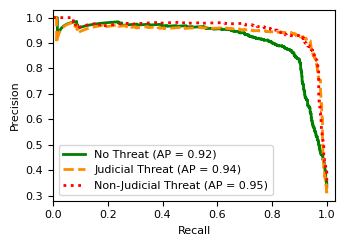

In [306]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df 
df = pd.read_json('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/Labeled_2261_test_yPred_preTrainFT_RoBERTa_withProbScores.json', orient='records')
y_true = df['Label']
y_probs = np.array(df['prob_scores'].tolist())  # Probabilities for each class (3 columns for 3 classes)

# Binarize the labels for multi-class Precision-Recall (One-vs-Rest strategy)
n_classes = 3
y_bin = label_binarize(y_true, classes=[0, 1, 2])

# Class names corresponding to the labels
class_names = {0: 'No Threat', 1: 'Judicial Threat', 2: 'Non-Judicial Threat'}

# Compute Precision-Recall and Average Precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_probs[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_probs[:, i])

# Set global font size to 8
plt.rcParams.update({'font.size': 8})

# Define line styles
line_styles = ['-', '--', ':']  # Solid, dashed, and dotted lines

# Plotting the Precision-Recall curves
plt.figure(figsize=(3.5, 2.5))
colors = cycle(['green', 'darkorange', 'red'])

for i, (color, line_style) in zip(range(n_classes), zip(colors, line_styles)):
    plt.plot(recall[i], precision[i], color=color, lw=2, linestyle=line_style,
             label='{} (AP = {:.2f})'.format(class_names[i], average_precision[i]))


print(average_precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.03])
plt.ylim([0.28, 1.03])
plt.tight_layout()

plt.savefig('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/PrecisionRecallCurve.png', format='png', dpi=1200)

plt.show()

# Temporal robustness

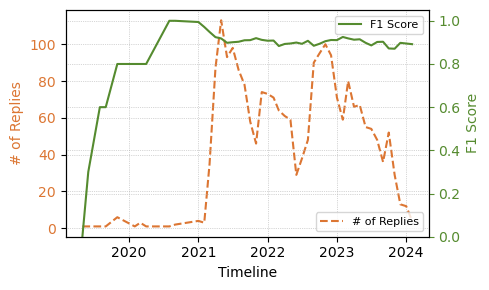

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.signal import savgol_filter

# Sample DataFrame (replace with your actual data)
df = df60k.copy()

# 1. Convert 'replyDate' from Unix timestamp to datetime
df['replyDate'] = pd.to_datetime(df['replyDate'], unit='s')

# 2. Extract month and year from 'replyDate'
df['month'] = df['replyDate'].dt.to_period('M')

# 3. Calculate F1 score (weighted) and count texts per month
monthly_f1_scores = []
monthly_counts = []
sorted_months = []

for month, group in df.groupby('month'):
    f1 = f1_score(group['Label'], group['y_pred'], average='weighted')
    monthly_f1_scores.append(f1)
    monthly_counts.append(len(group))
    sorted_months.append(month)

# 4. Sort the data by month in ascending order
sorted_indices = sorted(range(len(sorted_months)), key=lambda i: sorted_months[i])
sorted_months = [sorted_months[i] for i in sorted_indices]
monthly_f1_scores = [monthly_f1_scores[i] for i in sorted_indices]
monthly_counts = [monthly_counts[i] for i in sorted_indices]

# Convert sorted months to datetime for plotting
months = pd.to_datetime([str(m) for m in sorted_months])

# 5. Adjust the window size for Savitzky-Golay filter
# Apply Savitzky-Golay filter to smooth the F1 score
smoothed_f1_scores = savgol_filter(monthly_f1_scores, 5, 1)  # Window size, polynomial order
# smoothed_f1_scores = monthly_f1_scores

# 6. Plotting
fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot the number of texts (left y-axis)
ax1.plot(months, monthly_counts, linestyle='--', color='#DC7633', label='# of Replies')
ax1.set_xlabel('Timeline')
ax1.set_ylabel('# of Replies', color='#DC7633')
ax1.tick_params(axis='y', labelcolor='#DC7633')

# 7. Create the second y-axis for F1 score
ax2 = ax1.twinx()
ax2.plot(months, smoothed_f1_scores, color='#558B2F', label='F1 Score')
ax2.set_ylabel('F1 Score', color='#558B2F')
ax2.tick_params(axis='y', colors='#558B2F')

# Ensure F1 score axis starts at 0 and does not show negative values
ax2.set_ylim(bottom=0)

# Add legends for both plots
ax1.legend(loc='lower right', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Add grid lines
ax1.grid(True, which='both', linestyle=':', linewidth=0.5)
ax2.grid(True, which='both', linestyle=':', linewidth=0.5)

# 8. Final formatting
# fig.suptitle('Monthly Number of Texts and Weighted F1 Scores (Smoothed and Original)')
fig.tight_layout()

plt.savefig('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/Temporal_F1_preTrainFT_RoBERTa_60kSteps.png', format='png', dpi=1200)

plt.show()

# External case study (OOD)

In [5]:
dfEX = pd.read_json('/home/ravi/raviProject/DataModelsResults/Results/PreTrainAgain_FineTune_RoBERTa_400/preTrainedModel/CustomPreTrainedClassifier/remaining_V7_1M_NotUsed_yPred_preTrainFT_RoBERTa.json', orient='records')

In [6]:
dfEX.shape

(1000000, 6)

In [7]:
dfEX.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1617742775,RINO senator gets bad news!\n\n,1617831302,First of many that need to go.,AnalyzingAmerica.json,0
1,1621080177,Pavel B why dont you get one of these and...,1621080261,geez Captain that seems a bit extreme is it not?,PatriotStreetfighter.json,0
2,1674622933,🔴 35-Year-Old Middle School Teacher Collapses...,1674715049,Jab,ResisttheMainstream.json,0
3,1665931205,🔴 New York Times Hit With Online Backlash Ove...,1665950107,Ron Johnson is getting brutally attacked from ...,ResisttheMainstream.json,0
4,1664148018,🔴 Disturbing Video: 23-Year-Old Former Intern...,1664148223,Why would someone put a 😁 on this post? \n\nSi...,ResisttheMainstream.json,0


In [14]:
# Grouping by 'telegramChannel'
df = dfEX.copy()
result_df = df.groupby('telegramChannel').agg(
    no_of_unique_telegramChannel=('telegramChannel', 'size'),
    label_0_count=('y_pred', lambda x: (x == 0).sum()),
    label_1_count=('y_pred', lambda x: (x == 1).sum()),
    label_2_count=('y_pred', lambda x: (x == 2).sum())
).reset_index()

# Renaming columns to make it more readable
result_df.columns = ['telegramChannel', 'Sample count', 'No Threat', 'Judicial Threat', 'Non-Judicial Threat']

# Step 1: Remove '.json' from 'telegramChannel'
result_df['telegramChannel'] = result_df['telegramChannel'].str.replace('.json', '', regex=False)

# Step 2: Calculate percentages for 'No Threat', 'Judicial Threat', and 'Non-Judicial Threat'
result_df['No Threat (%)'] = (result_df['No Threat'] / result_df['Sample count'] * 100).round(2)
result_df['Judicial Threat (%)'] = (result_df['Judicial Threat'] / result_df['Sample count'] * 100).round(2)
result_df['Non-Judicial Threat (%)'] = (result_df['Non-Judicial Threat'] / result_df['Sample count'] * 100).round(2)

# Step 3: Create a new column for combined threat (Judicial + Non-Judicial)
result_df['Combined Threat (%)'] = result_df['Judicial Threat (%)'] + result_df['Non-Judicial Threat (%)']

# Step 4: Sort by 'Non-Judicial Threat (%)' in ascending order
result_df = result_df.sort_values(by='Combined Threat (%)', ascending=True)

# Step 5: Keep only the relevant columns
result_df = result_df[['telegramChannel', 'Sample count', 'No Threat (%)', 'Judicial Threat (%)', 'Non-Judicial Threat (%)', 'Combined Threat (%)']]

# Display the result
print(result_df)

             telegramChannel  Sample count  No Threat (%)  \
8            LacansWhreHouse         41399          99.28   
12                  RiotDogs         41479          98.98   
10              PrayingMedic         36625          98.92   
2   AnticapitalistSurrealism         42042          98.89   
16          UnitedAnarchists         29993          98.87   
4        COVIDVACCINEVICTIMS         24709          98.26   
9       PatriotStreetfighter         58240          97.90   
3          BlackCrimesMatter           600          97.83   
5              DonaldTrumpJr         73258          97.54   
13           ThePatriotVoice         83482          96.43   
6            FreedomFighters          7607          96.08   
0                  AlexJones          5509          95.63   
15    TrumpSupportersChannel         74522          93.78   
11       ResisttheMainstream        241033          93.76   
7                   InfoWars          8774          93.62   
14       TheTrumpRepubli